In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import scipy
import re
from tqdm import notebook

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

pd.set_option('max_columns', 100)

# Load the data 
(downloaded from Kaggle)

In [40]:
train = pd.read_csv('./data/02_KaggleTitanicTrain.csv')
test = pd.read_csv('./data/02_KaggleTitanicTest.csv')
# train_test = pd.concat([train,test]).reset_index(drop=True)
print(f'test: {test.shape}, train: {train.shape}')

test: (418, 11), train: (891, 12)


In [41]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [42]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
# train['title'] = train['Name'].apply(lambda x: x.split(',')[1].split(' ')[1])

In [44]:
# from itertools import groupby
# from operator import itemgetter

# data = [ 1, 4,5,6, 10, 15,16,17,18, 22, 25,26,27,28]
# for k, g in groupby(enumerate(data), lambda ix : ix[0] - ix[1]):
#     print(list(map(itemgetter(1), g)))

In [45]:
# train[(train['Ticket'].str.startswith(t[:-2]))]

In [46]:
# foos = list()
# for t in train['Ticket'].unique():
#     foo = train[(train['Ticket'].str.startswith(t[:-2]))].reset_index(drop=True)
#     foo['similar_ticket'] = 1
#     foos.append(foo)
#     break
    

# Explore the data

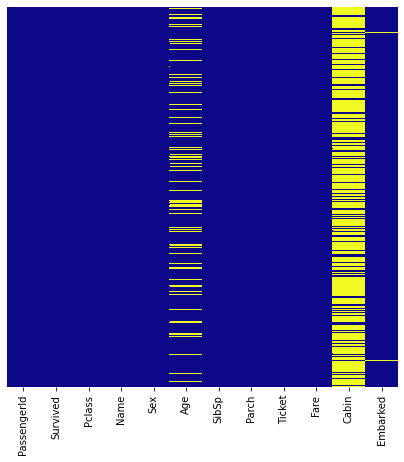

In [47]:
plt.subplots(figsize=(7, 7))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False, cmap='plasma')
plt.show()

## Fill the missing `Age` gaps
Based on a random sampling from the distributions of ages based on the class and gender

In [48]:
train[train['Age'].isna()].__len__(), train.__len__()

(177, 891)

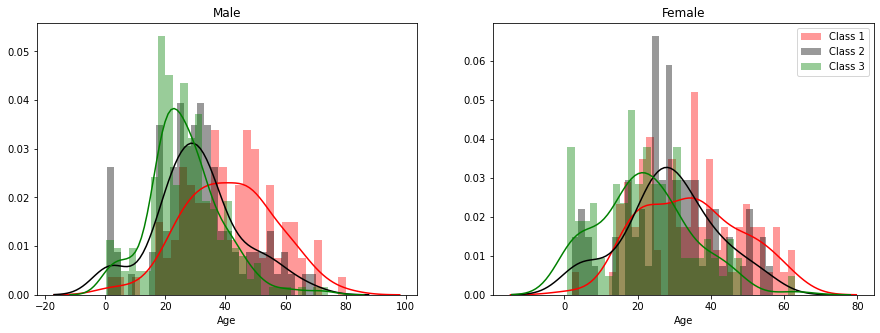

In [49]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
sns.distplot(train[(train['Pclass'] == 1) & (train['Sex'] == 'male')]['Age'],
             bins=30, color='red', label='Class 1', ax=ax1)
sns.distplot(train[(train['Pclass'] == 2) & (train['Sex'] == 'male')]['Age'],
             bins=30, color='black', label='Class 2', ax=ax1)
sns.distplot(train[(train['Pclass'] == 3) & (train['Sex'] == 'male')]['Age'],
             bins=30, color='green', label='Class 3', ax=ax1)

sns.distplot(train[(train['Pclass'] == 1) & (train['Sex'] == 'female')]['Age'],
             bins=30, color='red', label='Class 1', ax=ax2)
sns.distplot(train[(train['Pclass'] == 2) & (train['Sex'] == 'female')]['Age'],
             bins=30, color='black', label='Class 2', ax=ax2)
sns.distplot(train[(train['Pclass'] == 3) & (train['Sex'] == 'female')]['Age'],
             bins=30, color='green', label='Class 3', ax=ax2)

ax1.set_title('Male')
ax2.set_title('Female')
plt.legend()
plt.show()

In [50]:
for idx, row in train[train['Age'].isna()].iterrows():
    train.loc[idx, 'Age'] = train[(train['Pclass'] == row['Pclass']) & (train['Sex'] == row['Sex']) &
                                  (train['Age'].notna())]['Age'].sample(frac=0.2).mean()

No more missing values in the `Age` column

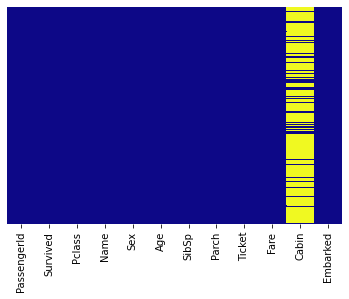

In [51]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False, cmap='plasma')
plt.show()

## Continue exploration

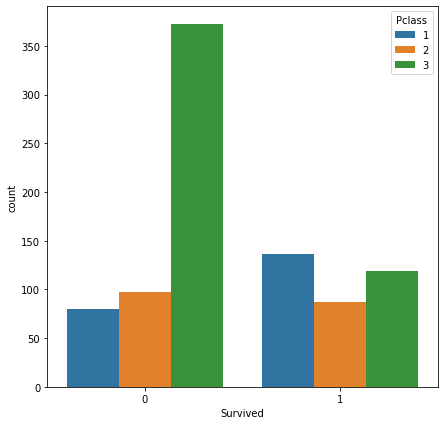

In [52]:
plt.subplots(figsize=(7, 7))
sns.countplot(x='Survived', data=train, hue='Pclass')
plt.show()

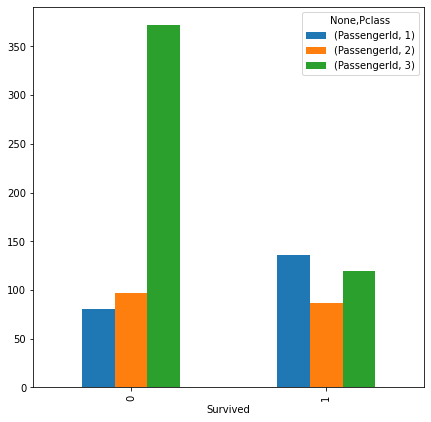

In [53]:
train.groupby(['Survived', 'Pclass']).count()[['PassengerId']].unstack().plot(kind='bar', figsize=(7, 7))
plt.show()

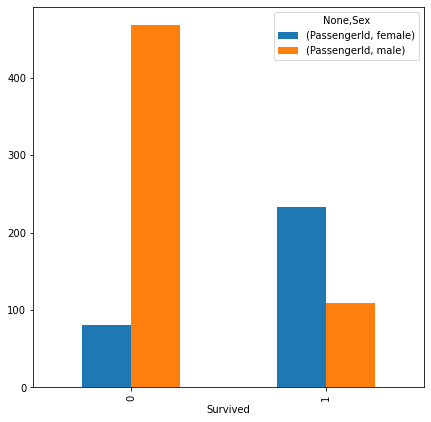

In [54]:
train.groupby(['Survived', 'Sex']).count()[['PassengerId']].unstack().plot(kind='bar', figsize=(7, 7))

# Clean data and create dummies

Drop `Cabin` column: too many `nan`

In [55]:
train.drop('Cabin',axis=1,inplace=True)

Drop `Ticket` and `Name`, no added value from strings

In [56]:
train.dropna(inplace=True)

In [57]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Get dummies from the `Sex` and `Embarked` columns, dropping one of the resulting to avoid collinearity

In [58]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
emb = pd.get_dummies(train['Embarked'], drop_first=True)
pclass = pd.get_dummies(train['Pclass'], drop_first=True)

In [59]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket',
            'PassengerId', 'Pclass'], axis=1, inplace=True)

In [60]:
train = pd.concat([train, sex, emb, pclass], axis=1)
train.rename(columns={2: 'Class_2', 3: 'Class_3'}, inplace=True)

In [61]:
train.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,Class_2,Class_3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


# LogisticRegression model

In [62]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=573)

In [63]:
lg = LogisticRegression(max_iter=10000)
lg.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [64]:
predictions = lg.predict(X_test)

In [65]:
metrics.accuracy_score(y_true=y_test, y_pred=predictions)

0.8689138576779026

In [66]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90       171
           1       0.80      0.84      0.82        96

    accuracy                           0.87       267
   macro avg       0.86      0.86      0.86       267
weighted avg       0.87      0.87      0.87       267



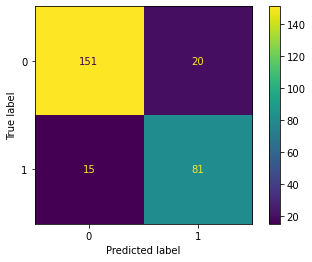

In [67]:
metrics.plot_confusion_matrix(lg, X=X_test, y_true=y_test)

In [68]:
max_pr = 0
prs = list()
for s in notebook.tqdm(range(0, 2000)):
s    X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=s)
    lg = LogisticRegression(max_iter=10000)
    lg.fit(X_train,y_train)
    predictions = lg.predict(X_test)
    pr = metrics.accuracy_score(y_true=y_test, y_pred=predictions)
    prs.append(pr)
    if pr > max_pr:
        max_pr = pr
        st = s
print(f'State: {st}, score: {max_pr}')


State: 1550, score: 0.8726591760299626


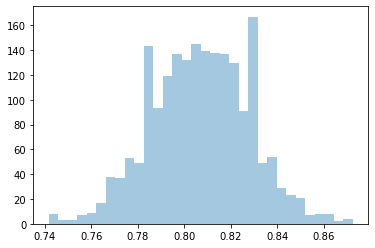

In [69]:
sns.distplot(prs, kde=False)